In [1]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

# database 
import psycopg2
import config as creds

In [2]:
#connecting to database 

In [3]:
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
print(conn_string)

host=aws-pg-db001.chpuoe9ndogr.us-east-1.rds.amazonaws.com port=5432 dbname=covid user=postgres password=awsdbpassword001


In [4]:
conn = psycopg2.connect(conn_string)

In [5]:
covid_df = pd.read_sql_query(
                   ''' SELECT * FROM coviddata 
                   ''' , conn)

In [6]:
covid_df

,id,country,provincestate,studypopsize,covidtest,meanage,male,whiteeuropean,africanamerican,asian,...,diarrhea,nauseavomiting,appetiteloss,sorethroatstuffynose,chills,chest_pain,smelltasteloss,nosymptoms,mortality,mortality_bin
0,ID ...,Country ...,Province/State ...,Study Pop Size (N) ...,Positive/negative cases ...,Mean Age ...,% Male ...,% White or European ...,% African American ...,% Asian ...,...,Diarrhoea ...,Nausea or Vomiting ...,Loss of Appetite/Anorexia ...,Sore Throat/Stuffy Nose ...,Chills ...,Chest Pain ...,Loss of smell/taste ...,Disease Severity Asymptomatic ...,Mortality ...,Mortality_bin ...
1,1 ...,China ...,Wuhan ...,191 ...,Positive only ...,56 ...,0.62 ...,0.0 ...,0.0 ...,1.0 ...,...,0.05 ...,0.04 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.28 ...,1 ...
2,1 ...,China ...,Wuhan ...,54 ...,Positive only ...,69 ...,0.7 ...,0.0 ...,0.0 ...,1.0 ...,...,0.04 ...,0.06 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,1.0 ...,1 ...
3,1 ...,China ...,Wuhan ...,137 ...,Positive only ...,52 ...,0.59 ...,0.0 ...,0.0 ...,1.0 ...,...,0.05 ...,0.03 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0 ...
4,2 ...,China ...,Wuhan ...,199 ...,Positive only ...,58 ...,0.6 ...,0.0 ...,0.0 ...,1.0 ...,...,0.02 ...,0.04 ...,0.01 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.16 ...,1 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,199 ...,China ...,Hubei ...,78 ...,Positive only ...,64 ...,0.65 ...,0.0 ...,0.0 ...,0.0 ...,...,0.03 ...,0.03 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.0 ...,0.13 ...,1 ...
1153,200 ...,USA ...,New York ...,151 ...,Positive only ...,56 ...,0.57 ...,0.0 ...,0.0 ...,0.0 ...,...,0.2 ...,0.09 ...,0.0 ...,0.11 ...,0.15 ...,0.0 ...,0.0 ...,0.0 ...,0.15 ...,1 ...
1154,200 ...,USA ...,New York ...,618 ...,Positive only ...,63 ...,0.57 ...,0.0 ...,0.0 ...,0.0 ...,...,0.25 ...,0.22 ...,0.0 ...,0.08 ...,0.19 ...,0.0 ...,0.0 ...,0.0 ...,0.13 ...,1 ...
1155,200 ...,USA ...,New York ...,231 ...,Positive only ...,62 ...,0.68 ...,0.0 ...,0.0 ...,0.0 ...,...,0.21 ...,0.1 ...,0.0 ...,0.08 ...,0.17 ...,0.0 ...,0.0 ...,0.0 ...,0.31 ...,1 ...


In [7]:
covid_df = covid_df.iloc[1:]
covid_df.dtypes

id                        object
country                   object
provincestate             object
studypopsize              object
covidtest                 object
meanage                   object
male                      object
whiteeuropean             object
africanamerican           object
asian                     object
hispaniclatino            object
otherethnicities          object
smoking                   object
hypertension              object
diabetes                  object
cardiovasculardisease     object
lungdisease               object
cancer                    object
liverdisease              object
cerebrovasculardisease    object
chronickidneydisease      object
otherconditions           object
fever                     object
tachypnea                 object
cough                     object
shortofbreath             object
headache                  object
sputum                    object
muscleaches               object
fatigue                   object
upperairwa

In [ ]:
# df = pd.read_csv('../Data/cleaned_data.csv')

In [ ]:
# testing = df[['Mean Age','Mortality']]
# testing

In [8]:
covid_df['meanage']=covid_df['meanage'].astype(str).astype(float)
covid_df['mortality']=covid_df['mortality'].astype(str).astype(float)
covid_df.dtypes

<ipython-input-8-e7368be7a4ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['meanage']=covid_df['meanage'].astype(str).astype(float)
<ipython-input-8-e7368be7a4ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['mortality']=covid_df['mortality'].astype(str).astype(float)


id                         object
country                    object
provincestate              object
studypopsize               object
covidtest                  object
meanage                   float64
male                       object
whiteeuropean              object
africanamerican            object
asian                      object
hispaniclatino             object
otherethnicities           object
smoking                    object
hypertension               object
diabetes                   object
cardiovasculardisease      object
lungdisease                object
cancer                     object
liverdisease               object
cerebrovasculardisease     object
chronickidneydisease       object
otherconditions            object
fever                      object
tachypnea                  object
cough                      object
shortofbreath              object
headache                   object
sputum                     object
muscleaches                object
fatigue       

Question 1: Is Age a factor in determining high risk mortality? 

In [9]:
#Create df with relevant columns to compare
age_plot = covid_df[['meanage','mortality']]
age_plot = age_plot.reindex()
age_plot

,meanage,mortality
1,56.0,0.28
2,69.0,1.00
3,52.0,0.00
4,58.0,0.16
5,59.0,0.15
...,...,...
1152,64.0,0.13
1153,56.0,0.15
1154,63.0,0.13
1155,62.0,0.31


In [14]:
age_plot = age_plot.rename(columns={"meanage": "Mean Age", "mortality": "Mortality"})

In [15]:
# Assign X and y variables
X = age_plot[["Mean Age"]]
y = age_plot[["Mortality"]]
print(X.shape, y.shape)


(1156, 1) (1156, 1)


Text(0.5, 1.0, 'Age vs Mortality')

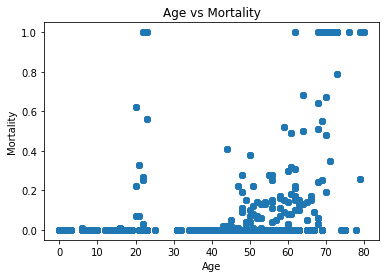

In [16]:
#Plot  
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.title('Age vs Mortality')

In [17]:
# Split data for test/train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Import KMeans with 6 clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [19]:
# Fit test values to model 
kmeans.fit(X_test, y_test)

KMeans(n_clusters=6)

In [20]:
# Find predicted clusters
predicted_clusters = kmeans.predict(X_test)

In [21]:
# Calculate for centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_


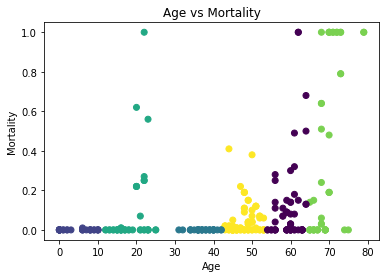

In [22]:
# Print clusters 
plt.scatter(X_test, y_test, c = labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.title('Age vs Mortality')
plt.savefig('../static/pltImages/ageRisk.png')

In [24]:
X_test, predicted_clusters, y_test;

In [25]:
# Create new dataframe with age 
risk_age = pd.DataFrame(X_test)


In [26]:
# Reset index 
risk_age.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [27]:
# Add predicted clusters to dataframe 
predicted_clusters =pd.DataFrame(predicted_clusters)
risk_age['predicted_clusters']=predicted_clusters

In [28]:
# Add mortality to datafrmae 
risk_age['Mortality']= y_test

In [29]:
# group by clusters 
grouped = risk_age.groupby(by=["predicted_clusters"])

In [30]:
# find average mortality rate by clusters 
mort = grouped.mean('Mortality')

In [31]:
# rename columns 
new_mort = mort.rename(columns={'Mortality':'AvgMortality'})

In [32]:
# min age per clusters and rename columns 
minimum = grouped.min('Mean Age')
new_min = minimum.rename(columns={'Mean Age':'MinAge'})

In [33]:
# max age per clusters and rename columns 
maximum = grouped.max('Mean Age')
new_max = maximum.rename(columns={'Mean Age':'MaxAge'})

In [34]:
# Group 0 age 54-64 with mortality of 0.100147
# Group 1 age 12-25 with mortality of 0.094681
# Group 2 

In [35]:
# combine into single df 
combined_df=pd.concat([new_mort, new_min, new_max],axis=1)
combined_df

,Mean Age,AvgMortality,MinAge,Mortality,MaxAge,Mortality
predicted_clusters,,,,,,
0,59.627119,0.117119,54.0,0.0,64.0,1.00
1,4.333333,0.000333,0.0,0.0,10.0,0.01
2,37.290323,0.000000,31.0,0.0,42.0,0.00
3,18.511628,0.086047,12.0,0.0,25.0,1.00
4,69.326087,0.371087,65.0,0.0,79.0,1.00
5,47.662500,0.044125,43.0,0.0,53.0,0.41


In [36]:
# grab relevant columsn to compare and sort 
results = combined_df[['MinAge','MaxAge','AvgMortality']]
end_results = results.sort_values(by=['AvgMortality'])
end_results

,MinAge,MaxAge,AvgMortality
predicted_clusters,,,
2,31.0,42.0,0.000000
1,0.0,10.0,0.000333
5,43.0,53.0,0.044125
3,12.0,25.0,0.086047
0,54.0,64.0,0.117119
4,65.0,79.0,0.371087


In [37]:
# end of question 1 

In [ ]:
 #vaccine recommendations? Why ages 12-25 higher mortality? 
# possible mental illness and also socializing via covid parties etc... 

In [ ]:
# print as csv 
end_results.to_csv ('../static/pltImages/ageRisk.csv', header=True)